In [1]:
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

## Mezcla de gaussianas
En este ejercicio no vamos a implementar (¡de momento!) el algoritmo EM para una mixtura de gaussianas sino que vamos a utilizar la clase GaussianMixture de Scikit-Learn. Los parámetros que necesitamos utilizar son n_components (número de componentes en la mezcla), covariance_type (tipo de matriz de covarianza), means_init, weights_init, precisions_init, init_param (inicialización de los parámetros) y max_iter (número de iteraciones del algoritmo EM).

La siguiente es una función auxiliar para dibujar el contorno correspondiente a una derivación estándar de una distribución gaussiana bidimensional.

In [2]:
def plot_gaussian_contour(mean, cov, ax=None):
    """
    Dibujar el contorno de una derivación estándar en una distribución gaussiana 2D.

    Entrada:
    mean : array-like, shape (2,)
        La media de la distribución gaussiana.
    cov : array-like, shape (2, 2)
        Matriz de covarianza de la distribución gaussiana.
    ax : matplotlib.axes.Axes, optional
        Los ejes en que pintar el dibujo. Si None, se crea una nueva figura.
    """
    if ax is None:
        fig, ax = plt.subplots()

    # Calcular autovalores y autovectores con eigh (optimizado para matrices simétricas)
    eigenvalues, eigenvectors = np.linalg.eigh(cov)

    # Ángulo de rotación.
    angle = np.degrees(np.arctan2(*eigenvectors[:,0][::-1]))

    # Ancho y alto de las dos desviación estándar (se corresponden con los autovalores).
    width, height = 2 * np.sqrt(eigenvalues)

    # Dibujar elipse.
    ellipse = Ellipse(xy=mean, width=width, height=height,
                      angle=angle, fill=False, color='blue')
    ax.add_artist(ellipse)

    return ax

Construimos el conjunto de datos de prueba.

In [3]:
l = 0.2
r1 = 0.5

rng = np.random.default_rng(123)
X = np.zeros((2,100))
for r in range(100):
    rad = r1 + rng.uniform() * l
    theta = rng.uniform() * 2 * np.pi
    X[0,r] = rad * np.cos(theta)
    X[1,r] = rad * np.sin(theta)

Usamos Scikit-Learn para crear el modelo de mezcla gaussiana. No se trata tanto de replicar exactamente las figuras del libro (lo que puede no ser posible) sino de apreciar ese comportamiento general. Probar con distintas inicializaciones de las medias, de las covarianzas, distinto número de iteraciones...

/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:270: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:270: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


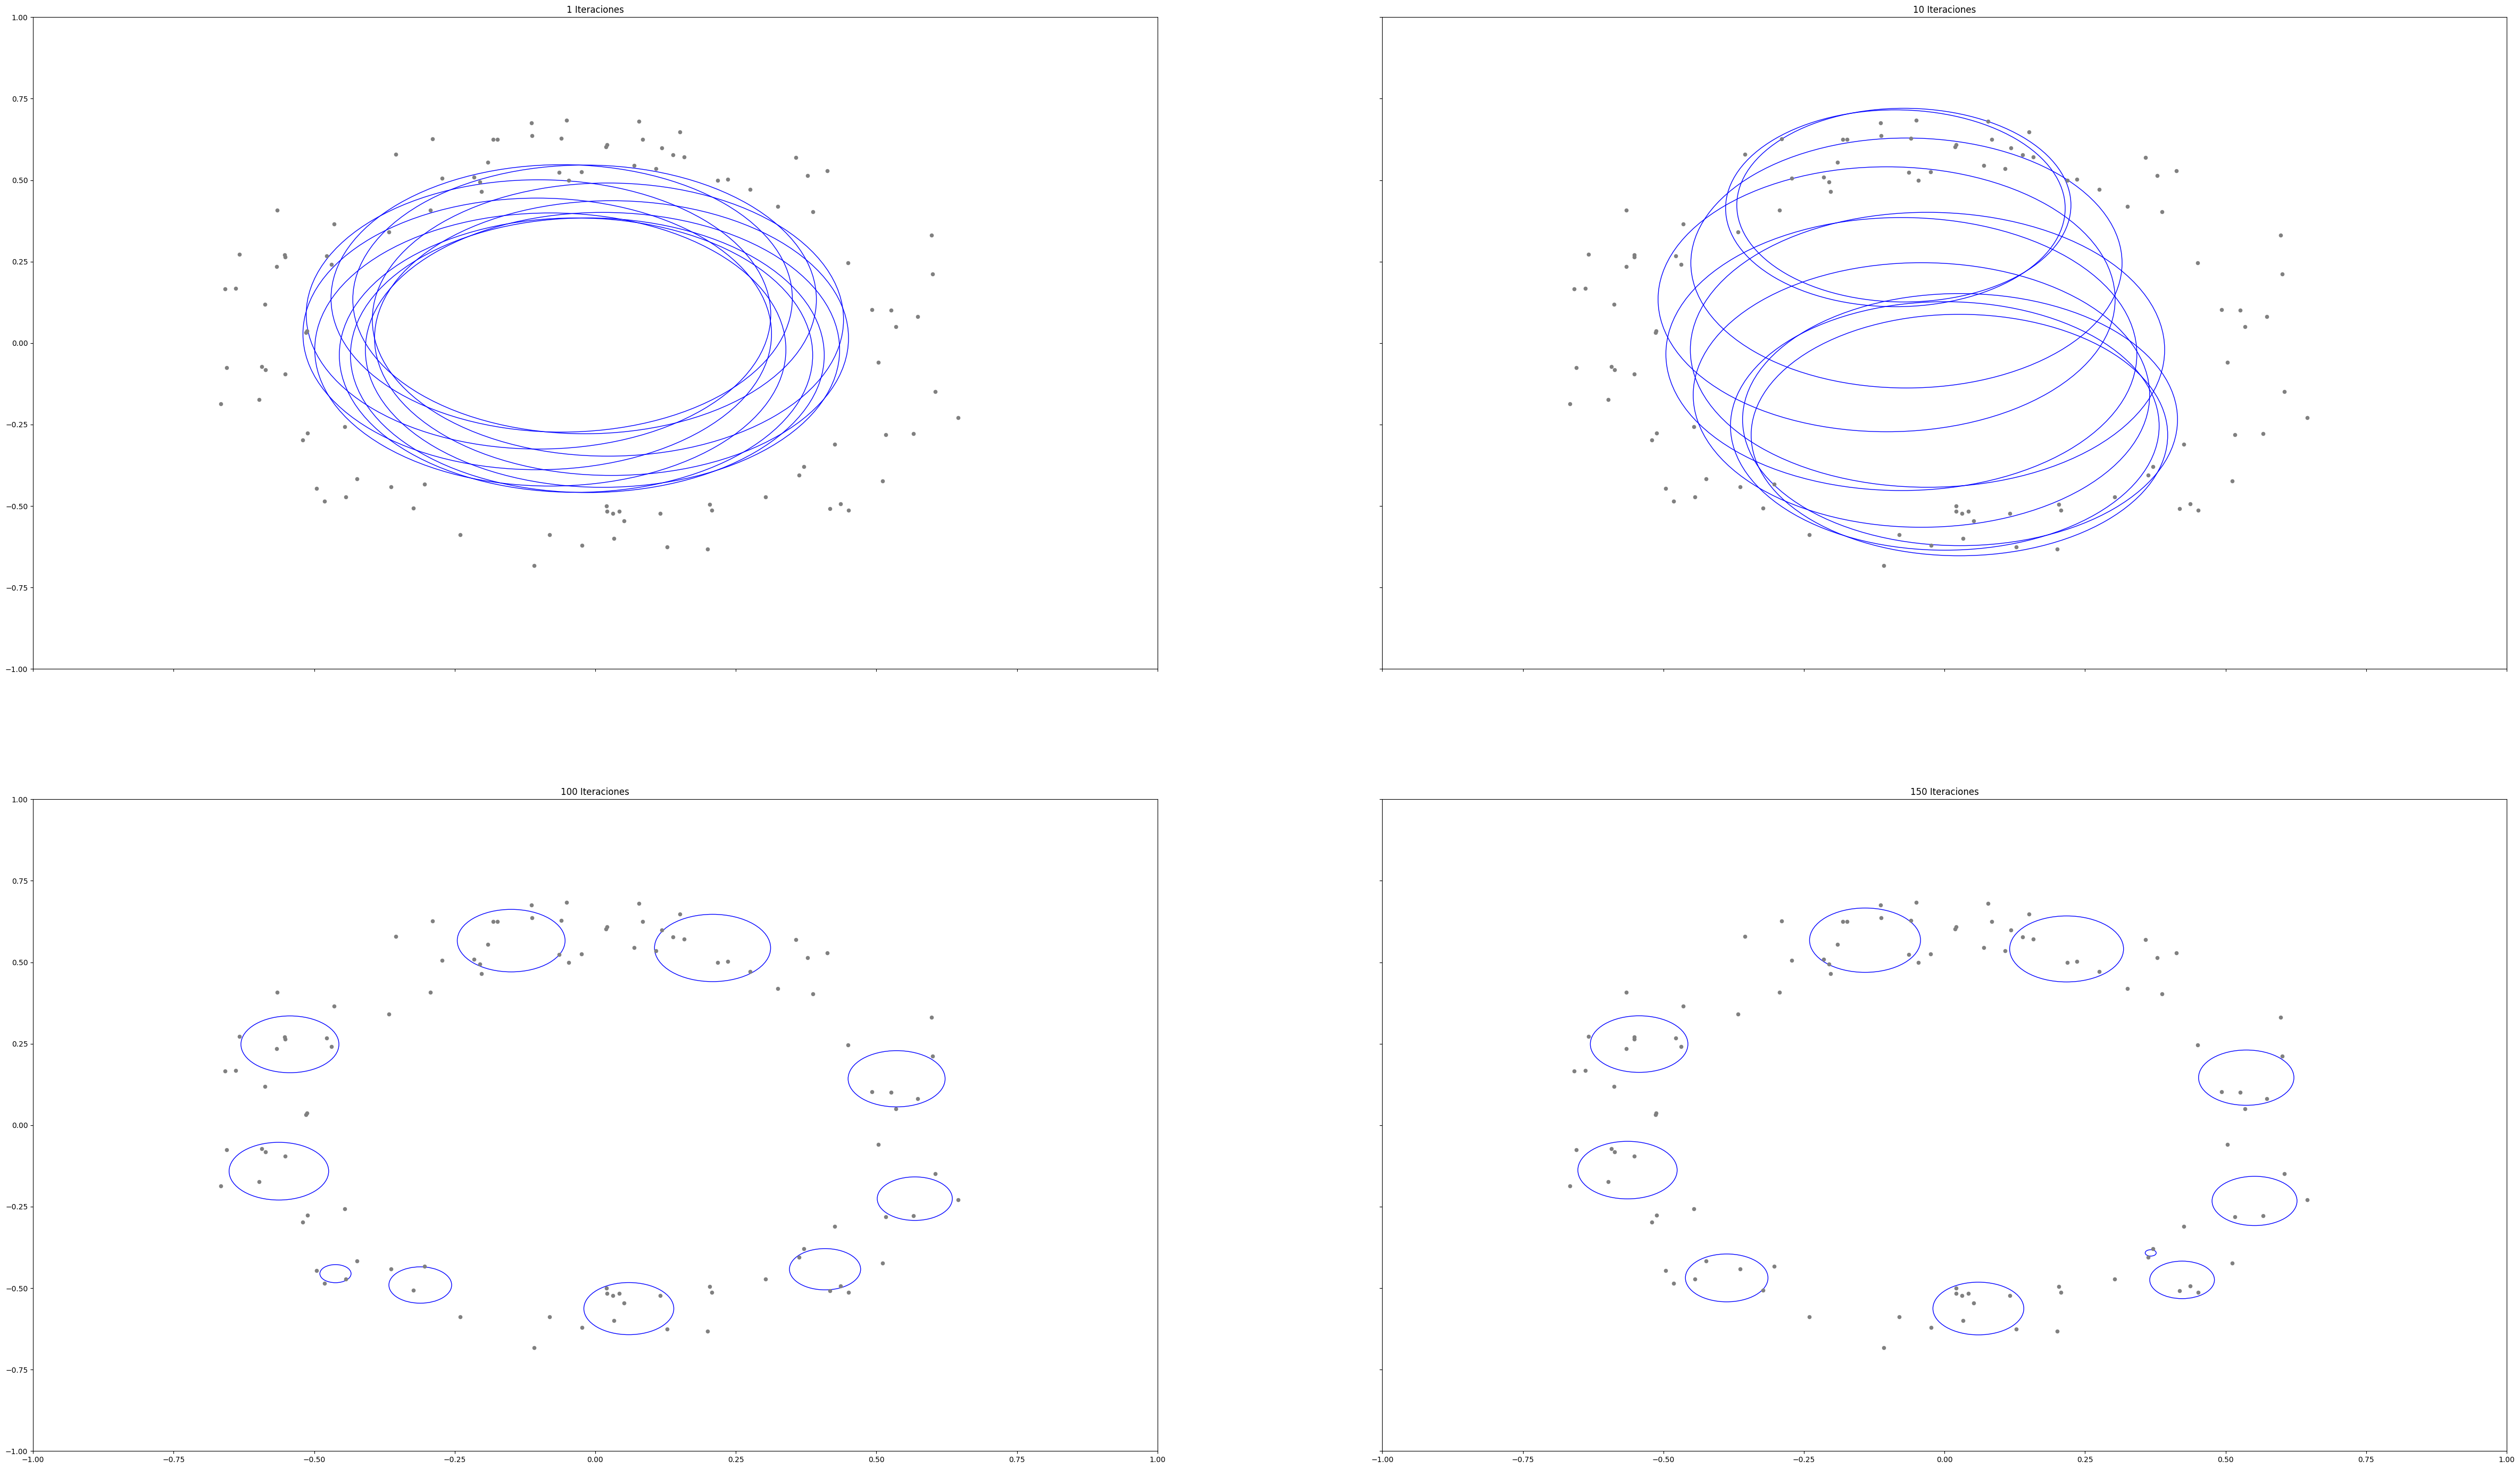

In [69]:
fig, axes = plt.subplots(2, 2, figsize=(60, 35), sharex=True, sharey=True)

# Probar distintas inicializaciones de los parámetros.
s = np.cov(X).mean()
S = np.ones(10)*s*9

for idx, it in enumerate([1, 10, 100, 150]):
    # Para impedir que las varianzas colapsen podría ser necesario utilizar el parámetro reg_covar.
    model = GaussianMixture(n_components= 10, covariance_type = 'spherical', reg_covar = 1e-6, means_init = None, weights_init = None, precisions_init = S, init_params = 'kmeans', max_iter = it).fit(X.T)
    for(mean, cov) in zip(model.means_, model.covariances_):
      cov_matrix = cov * np.eye(X.shape[0])
      plot_gaussian_contour(mean, cov_matrix, axes[idx//2, idx%2])

    axes[idx // 2, idx % 2].scatter(X[0], X[1], s=20, color='gray')
    axes[idx // 2, idx % 2].set_title(f'{it} Iteraciones')
    axes[idx // 2, idx % 2].set_xlim(-1, 1)
    axes[idx // 2, idx % 2].set_ylim(-1, 1)

plt.show()

In [72]:
# Probar distintas inicializaciones de los parámetros.
s = np.cov(X).mean()
S = np.ones(10)*s*9

for idx, it in enumerate([1, 10, 100, 150]):
    # Para impedir que las varianzas colapsen podría ser necesario utilizar el parámetro reg_covar.
    model = GaussianMixture(n_components= 10, covariance_type = 'spherical', reg_covar = 1e-6, means_init = None, weights_init = None, precisions_init = S, init_params = 'kmeans', max_iter = it).fit(X.T)
    for(mean, cov) in zip(model.means_, model.covariances_):
      cov_matrix = cov * np.eye(X.shape[0])
      print(mean,cov_matrix)

[0.02255817 0.07215281] [[0.17561273 0.        ]
 [0.         0.17561273]]
[-0.10094844  0.08800801] [[0.17066499 0.        ]
 [0.         0.17066499]]
[-0.02701798 -0.03705929] [[0.17739773 0.        ]
 [0.         0.17739773]]
[-0.00429884  0.1241167 ] [[0.17123393 0.        ]
 [0.         0.17123393]]
[-0.10316566  0.02817798] [[0.17365965 0.        ]
 [0.         0.17365965]]
[ 0.01289905 -0.02077165] [[0.17790425 0.        ]
 [0.         0.17790425]]
[-0.06748318  0.13384405] [[0.16832767 0.        ]
 [0.         0.16832767]]
[0.02896226 0.0154173 ] [[0.17766957 0.        ]
 [0.         0.17766957]]
[-0.07989877 -0.0196746 ] [[0.17559084 0.        ]
 [0.         0.17559084]]
[-0.03796945  0.14187222] [[0.16855553 0.        ]
 [0.         0.16855553]]
[-0.0261744  -0.19944902] [[0.15785215 0.        ]
 [0.         0.15785215]]
[-0.08747948  0.413393  ] [[0.09126919 0.        ]
 [0.         0.09126919]]
[ 0.00794666 -0.16479174] [[0.16433405 0.        ]
 [0.         0.16433405]]
[-0

/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:270: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:270: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


## Cuestiones
Analizar los resultados obtenidos.

## Análisis de Resultados de la Mezcla Gaussiana Esférica

### Iteraciones Bajas (1 y 10)
- **Iteración 1**:
  - Las medias y varianzas iniciales de cada componente son moderadas. Las medias están distribuidas alrededor del origen, y las varianzas son relativamente grandes (~0.17).
- **Iteración 10**:
  - Las medias empiezan a diferenciarse y algunas componentes muestran desplazamientos significativos, aunque aún no tan marcados como en iteraciones posteriores. Las varianzas muestran una ligera reducción en algunos componentes.

### Iteraciones Intermedias (100)
- A medida que aumentan las iteraciones, las medias se distribuyen más ampliamente. Algunas componentes alcanzan valores absolutos de medias superiores a 0.5, indicando una especialización en distintas regiones del espacio de datos.
- Las varianzas de los componentes disminuyen notablemente (~0.005 a 0.01), sugiriendo que el modelo está ajustando los componentes más estrechamente a los datos. Esto implica que el modelo está capturando patrones más específicos y evitando la superposición de las distribuciones en cada componente.

### Iteraciones Altas (150)
- Con más iteraciones, el modelo se ajusta aún más a clusters específicos, con algunas medias que alcanzan valores elevados.
- Las varianzas de algunos componentes son extremadamente bajas (~0.001), lo que puede indicar un *colapso de varianza*, atrapando al modelo en un mínimo local. Aunque `reg_covar=1e-6` ayuda a evitar un colapso total, algunos valores de varianza tan bajos pueden provocar problemas de generalización.
